# CUSTOMER CHURN ANALYSIS

# Import Required Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pandas → data handling

numpy → numerical operations

matplotlib & seaborn → visualization

# load the dataset

In [36]:
df = pd.read_csv("customer_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,No,No,50,Yes,Fiber optic,Month-to-month,Bank transfer,27.51,1375.50,No
1,CUST0002,Female,0,No,Yes,46,Yes,Fiber optic,Month-to-month,Electronic check,73.57,3384.22,No
2,CUST0003,Male,0,No,Yes,3,Yes,No,Month-to-month,Bank transfer,105.45,316.35,Yes
3,CUST0004,Male,0,No,Yes,6,Yes,DSL,Month-to-month,Bank transfer,20.49,122.94,Yes
4,CUST0005,Male,0,Yes,No,34,Yes,DSL,Month-to-month,Bank transfer,113.67,3864.78,Yes


# Understand the Data

In [37]:
df.shape        # rows and columns


(1000, 13)

In [38]:
df.columns      # column names


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
df.info()       # data types & missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       1000 non-null   object 
 1   gender           1000 non-null   object 
 2   SeniorCitizen    1000 non-null   int64  
 3   Partner          1000 non-null   object 
 4   Dependents       1000 non-null   object 
 5   tenure           1000 non-null   int64  
 6   PhoneService     1000 non-null   object 
 7   InternetService  1000 non-null   object 
 8   Contract         1000 non-null   object 
 9   PaymentMethod    1000 non-null   object 
 10  MonthlyCharges   1000 non-null   float64
 11  TotalCharges     1000 non-null   float64
 12  Churn            1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [40]:
df.describe()   # statistical summary


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.160000,36.195000,71.364800,2598.270430
std,0.366789,20.575722,28.908547,1933.437741
min,0.000000,0.000000,20.290000,0.000000
25%,0.000000,18.000000,47.370000,1044.675000
50%,0.000000,36.000000,72.110000,2193.180000
75%,0.000000,54.250000,96.667500,3806.877500
max,1.000000,71.000000,119.820000,8392.910000


# check missing values

In [41]:
df.isnull().sum()


customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

# Data Cleaning
 # Convert TotalCharges to numeric

In [42]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Drop missing values

In [43]:
df.dropna(inplace=True)


 # Verify again

In [44]:
df.isnull().sum()


customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

Target Variable Analysis (Churn)

In [45]:
df['Churn'].value_counts()


Churn
No     714
Yes    286
Name: count, dtype: int64

In [46]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     71.4
Yes    28.6
Name: proportion, dtype: float64

Shows churn percentage

# Churn Distribution (Visualization)

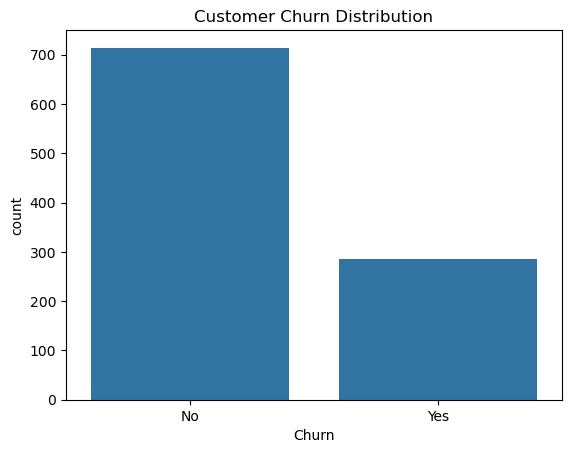

In [48]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


#  Churn vs Gender

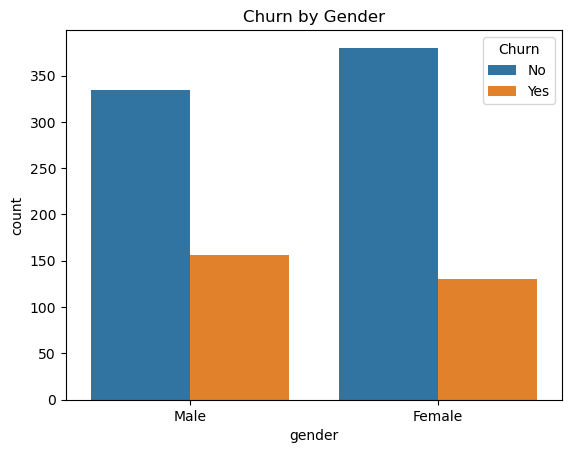

In [49]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


Gender usually has less impact on churn

# Churn vs Contract Type

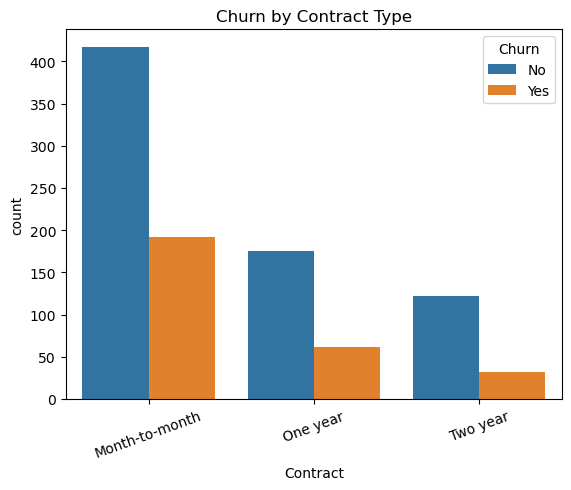

In [50]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()


 Month-to-month contract customers churn the most


# Churn vs Tenure

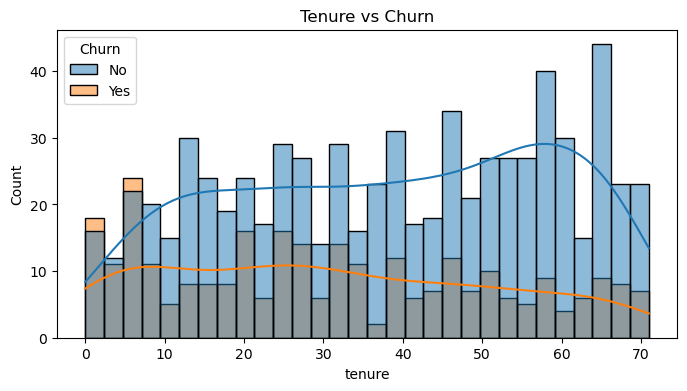

In [51]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure vs Churn")
plt.show()


Customers with low tenure have higher churn


 # Monthly Charges vs Churn

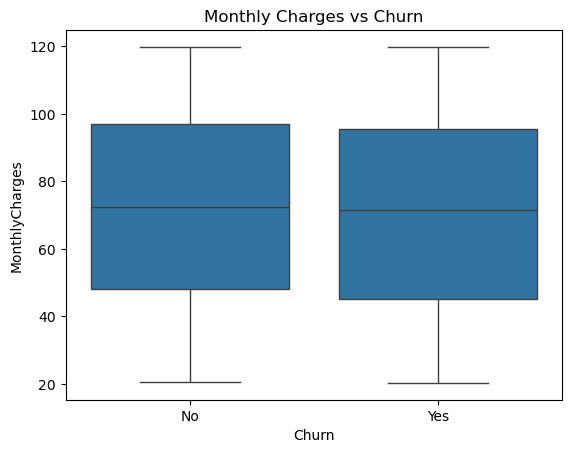

In [52]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


 High monthly charges increase churn probability


 # Payment Method vs Churn

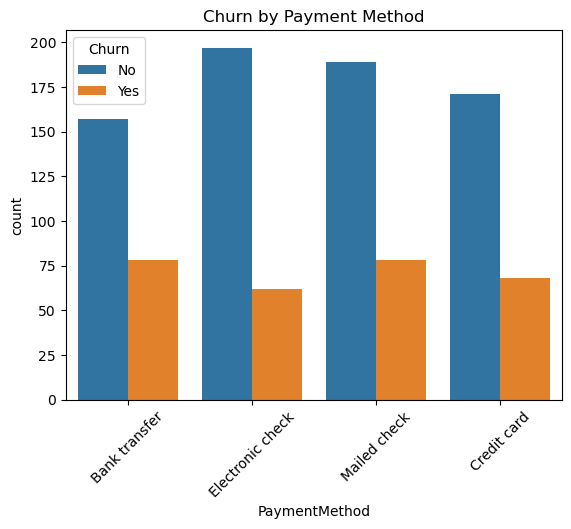

In [53]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


Electronic check payment method shows higher churn


# Senior Citizen vs Churn

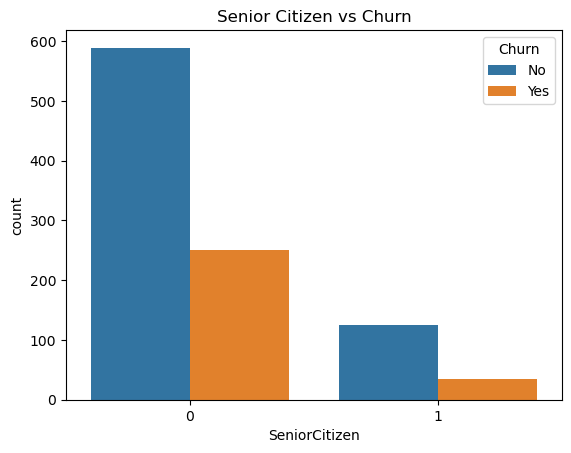

In [54]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizen vs Churn")
plt.show()


#  Correlation Analysis (Numeric Data)

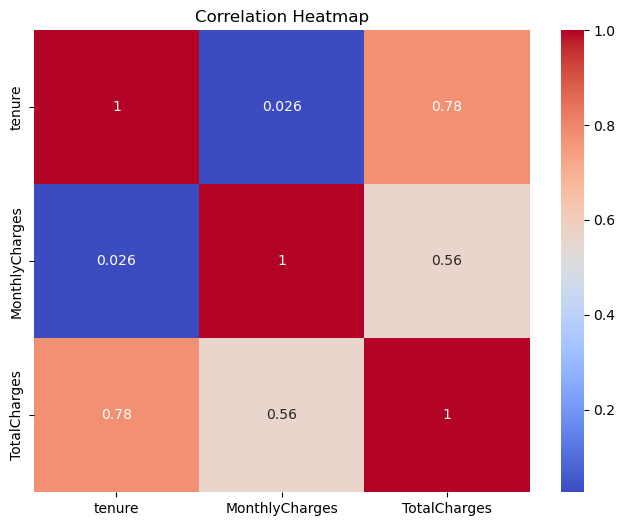

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Key Insights

- Month-to-month contract customers show the highest churn rate.
- Customers with lower tenure are more likely to churn.
- Higher monthly charges increase the probability of churn.
- Contract type has a stronger impact on churn compared to gender.


# Save Cleaned Data 

In [56]:
df.to_csv("cleaned_customer_churn.csv", index=False)


# Customer Churn Analysis – Summary Table
| Factor Analyzed      | Comparison                     | Observation                                       | Impact on Churn |
| -------------------- | ------------------------------ | ------------------------------------------------- | --------------- |
| **Contract Type**    | Month-to-month vs One/Two year | Month-to-month customers leave more frequently    | 🔴 High         |
| **Tenure**           | New vs Long-term customers     | Customers with low tenure churn more              | 🔴 High         |
| **Monthly Charges**  | High vs Low charges            | Higher charges increase churn probability         | 🔴 High         |
| **Payment Method**   | Electronic check vs Others     | Electronic check users churn more                 | 🟠 Medium       |
| **Gender**           | Male vs Female                 | No major difference in churn                      | 🟢 Low          |
| **Senior Citizen**   | Yes vs No                      | Senior citizens show slightly higher churn        | 🟠 Medium       |
| **Internet Service** | Fiber vs DSL/No                | Fiber optic users churn more due to higher cost   | 🟠 Medium       |
| **Total Charges**    | High vs Low                    | Higher total charges correlate with longer tenure | 🟢 Low          |
| **Phone Service**    | Yes vs No                      | Minimal effect on churn                           | 🟢 Low          |


# Business Recommendations (Mapped to Table)
| Problem                      | Recommendation                            |
| ---------------------------- | ----------------------------------------- |
| High churn in monthly plans  | Encourage yearly contracts with discounts |
| New customers leaving        | Improve onboarding & first-month offers   |
| High charges dissatisfaction | Personalized pricing or loyalty benefits  |
| Payment-related churn        | Promote auto-pay & bank transfer options  |
